# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import numpy as np

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)
Number of classes: 100


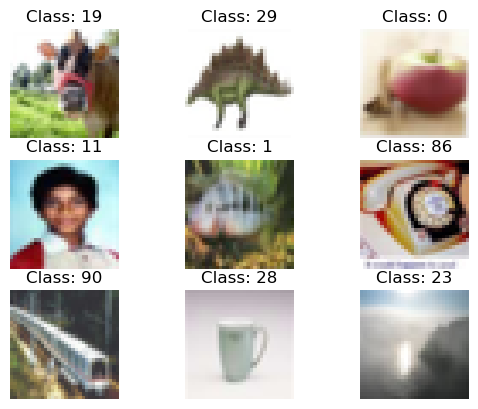

In [3]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
    plt.imshow(x_train[i])

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from tensorflow.keras.utils import to_categorical

#
# normalize all pixel values to range of [0,1]
#
x_train = x_train / 255.0
x_test = x_test / 255.0

#
# convert lables to one-hot encoded vectors
#
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from sklearn.model_selection import train_test_split

#
# Split training set to training and validation set
#

x_train, x_validation, y_train, y_validation = train_test_split(
    x_train,
    y_train,
    test_size=0.2,
    random_state=42
)

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_validation: {x_validation.shape}")
print(f"y_validation: {y_validation.shape}")

x_train: (40000, 32, 32, 3)
y_train: (40000, 100)
x_validation: (10000, 32, 32, 3)
y_validation: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    InputLayer(x_train.shape[1:]),
    Conv2D(32, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(100, activation='softmax')
])
model.summary()

2024-12-03 12:35:43.976505: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-03 12:35:43.976531: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-03 12:35:43.976534: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-03 12:35:43.976554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-03 12:35:43.976577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,638,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,892 (6.32 MB)

 Trainable params: 1,657,892 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

<span style="color:orange">

- <b>Loss function:</b> 'categorical_crossentropy' is chosen as it is the standard loss function for multi-class classification model

- <b>Optimizer:</b> 'adam' is chosen as the optimizer function as we learned from class this is generally a good optimizer to use for many cases as it adjusts the learning rate throughout training

</span>

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

Epoch 1/10


2024-12-03 12:35:45.280291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.1327 - loss: 3.8586 - val_accuracy: 0.2843 - val_loss: 3.0084
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3696 - loss: 2.5690 - val_accuracy: 0.3271 - val_loss: 2.8173
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5069 - loss: 1.9431 - val_accuracy: 0.3413 - val_loss: 2.8985
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6357 - loss: 1.4007 - val_accuracy: 0.3313 - val_loss: 3.1914
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7628 - loss: 0.9097 - val_accuracy: 0.3282 - val_loss: 3.6060
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8647 - loss: 0.5199 - val_accuracy: 0.3179 - val_loss: 4.3335
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9234 - loss: 0.2946 - val_accuracy: 0.3062 - val_loss: 5.1139
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9527 - loss: 0.17

<span style="color:orange">

Epoch value of 10 was chosen initially as it is a small number and good starting point. From first run, the accuracy reaches over 90% range after 7 epochs, so there's no value in increasing the epoch beyond 10 in subsequent runs

</span>

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [9]:
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

loss, accuracy = model.evaluate(x_test, y_test)
f1 = f1_score(y_test_classes, y_pred_classes, average="macro")

print(f"Test loss: {loss:.2f}")
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test F1: {f1:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2984 - loss: 7.0406
Test loss: 7.07
Test accuracy: 29.36%
Test F1: 0.30


<span style="color:orange">

- <b>Accuracy:</b> 29.36%

- <b>Other metric:</b> F1 score

- <b>Reason for selection:</b> F1 score is a metric that combines both the recall and precision of the model and provides a more comprehensive evaluation metric than accuracy

- <b>Value of metric:</b> 0.30

- <b>Interpretation of metric value:</b> With both accuracy around 30% and F1 score at 0.3, it shows the model requires further work to improve its performance.

</span>

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

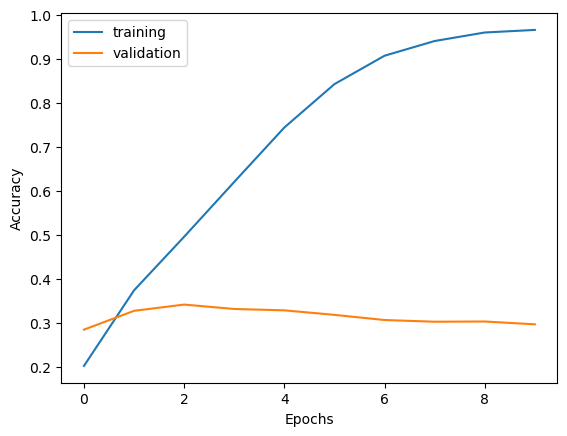

In [10]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<span style="color:orange">

The plot shows while the accuracy continues to improve with each epoch, the validation accuracy is stuck around 30% from early on. This indicates an overfitting problem.

</span>

Predicted: 30
Actual: 49
Classification probabilities: [1.8814326e-16 3.2206504e-09 1.3609804e-02 1.5131394e-07 3.7154743e-06
 5.2321830e-08 5.6293339e-07 1.3029482e-03 1.2939279e-04 2.1094326e-09
 1.4294562e-07 1.2213656e-01 8.7538233e-04 1.9779234e-06 1.1221723e-08
 7.2509884e-08 4.4641357e-09 4.0235714e-11 1.7212922e-04 1.1087712e-11
 2.8896969e-07 9.4799524e-12 3.4649074e-06 2.4654303e-04 2.0981613e-05
 1.7595085e-08 7.4115707e-07 1.2458510e-02 4.2506281e-12 6.9416046e-06
 7.2155446e-01 2.9920901e-07 8.7450847e-10 1.4608484e-10 2.7197171e-08
 4.8336037e-03 1.8252855e-14 2.6770065e-11 1.6484641e-10 4.7508071e-05
 2.6067861e-04 2.6677175e-05 2.0135113e-08 1.6290856e-09 3.1604865e-04
 1.0852482e-06 4.4744492e-02 2.5847536e-12 9.3879253e-06 5.0423246e-02
 1.2813032e-06 9.4386863e-09 5.8427216e-13 1.5875682e-12 3.9208066e-06
 4.9973337e-06 1.2032237e-05 1.5517719e-08 1.6746762e-06 1.0719594e-04
 2.0622923e-14 3.7397212e-12 1.4826482e-10 8.4052363e-07 9.0057704e-09
 9.0248967e-08 1.70404

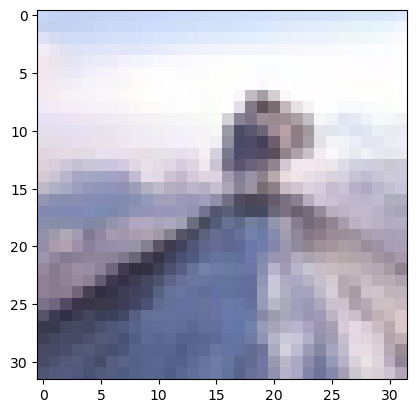

In [11]:
from matplotlib.pyplot import imshow

predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_classes != actual_classes)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

imshow(misclassified_samples[0])
print(f"Predicted: {predicted_classes[misclassified_indices[0]]}")
print(f"Actual: {actual_classes[misclassified_indices[0]]}")
print(f'Classification probabilities: {y_pred[misclassified_indices[0]]}')

[30 11 49 46  2 95 27 84 35 73 91  7 12 79 44 40 23 18 99  8 59 39 90 41
 86 24 56 48 93 98 29 55 78 54  4 22 68 13 58 50 76 45 63 26  6 67 72 80
 77 74 31 20 87 66  3 10 65 15  5 34 42 85 97 25 57 14 51 64 16  1 89 75
  9 82 43 32 88 96 69 38 62 33 17 37 83 92 19 21 81 28 61 47 53 52 70 60
 36 71  0 94]


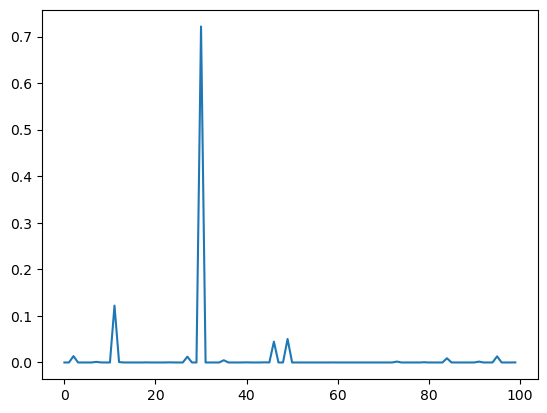

In [12]:
#
# Rank classes by probabilities (first value is the incorrectly predicted class)
#
tmp = y_pred[misclassified_indices[0]]
print(np.argsort(tmp)[::-1])

#
# Plot the probabilities to help see how the relative probability of the actual
# class
#
plt.plot(np.arange(0,100), y_pred[misclassified_indices[0]])
plt.show()

<span style="color:orange">

As shown by both the array of probabilies and graph, the model predicted the image to be of class 30 by close to 70% and the actual class (49) has the third highest probability of less than 10%. This means the model has very high confidence of its prediction for this image.

</span>

Predicted: 33
Actual: 33
Classification probabilities: [1.53193138e-08 3.03506880e-07 3.49662965e-03 1.30045330e-04
 3.47610376e-06 8.54810622e-09 5.66461540e-06 5.73626585e-06
 4.12011315e-04 4.57792776e-04 1.75725834e-09 2.90344215e-05
 4.19043658e-07 1.45664274e-06 2.54352085e-06 9.76459447e-08
 2.04673347e-06 2.56746223e-14 2.48643532e-02 1.04797700e-05
 4.31020135e-06 6.86930068e-10 3.75969694e-06 3.58964872e-14
 1.54993449e-10 7.88088146e-05 2.00619596e-07 3.73096700e-05
 3.65871289e-09 2.76318612e-08 1.62145002e-11 7.18803421e-05
 7.10449797e-08 8.06151211e-01 3.10913514e-04 2.12580053e-05
 1.99366017e-08 2.97482325e-06 1.48806779e-04 2.88131408e-09
 1.94653396e-08 2.28432939e-09 1.28158729e-03 2.62650690e-04
 5.68806627e-06 1.69702091e-07 1.80515858e-09 4.65314592e-10
 6.97740319e-08 1.28959205e-16 4.35653601e-06 9.97658572e-06
 1.13597655e-13 1.22267886e-12 2.43123432e-05 7.35037053e-09
 1.18268008e-06 3.15080115e-06 1.16207133e-08 5.78182373e-08
 3.50845245e-19 2.76179876e-13

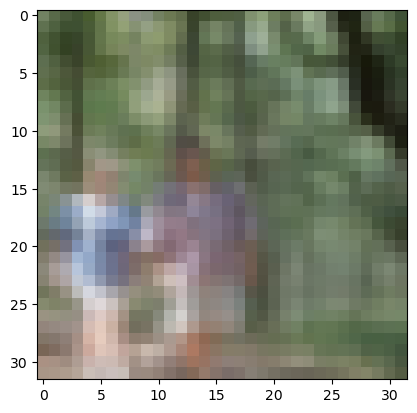

In [13]:
correct_indices = np.where(predicted_classes == actual_classes)[0]
correct_samples = x_test[correct_indices]
correct_labels = np.argmax(y_test[correct_indices], axis=1)

imshow(correct_samples[0])
print(f"Predicted: {predicted_classes[correct_indices[0]]}")
print(f"Actual: {actual_classes[correct_indices[0]]}")
print(f'Classification probabilities: {y_pred[correct_indices[0]]}')

[33 65 97 18 80  2 66 42  9 91  8 34 43 38 84 74  3 63 25 31 96 93 27 11
 54 35 88 19 51 79  7 44  6 50 20 22  4 57 37 14 16 13 98 56 67 87 81 12
  1 64 26 45 77 70 90 15 73 32 48 59 68 78 29 72 36 40  0 58  5 55 62 86
 76 28 39 89 41 46 10 83 75 21 94 47 85 99 95 24 82 92 69 30 53 61 52 23
 17 71 49 60]


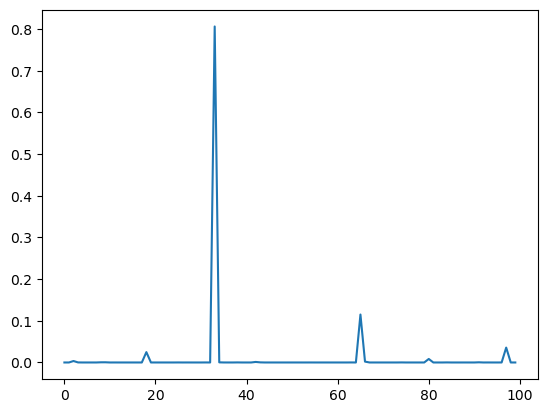

In [14]:
#
# Rank classes by probabilities (first value is the incorrectly predicted class)
#
tmp = y_pred[correct_indices[0]]
print(np.argsort(tmp)[::-1])

#
# Plot the probabilities to help see how the relative probability of the actual
# class
#
plt.plot(np.arange(0,100), y_pred[correct_indices[0]])
plt.show()

<span style="color:orange">

The classification probabilities shows the probability of the image for each class. The highest value means the predicted class for the image. For example, 

</span>

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

<span style="color:orange">

The model's accuracy continues to improve during the training, but the accuracy of the validation stays around 0.3. The divergent suggests the model has an overfitting problem. One technique to solve the overfitting problem is by adding a dropout layer to our model. A dropout layer randomly sets input elements to zero during training to prevent overfitting.

After seeing improvement with the additional dropout layer, the number of filters were increased from 32 and 64 to 128 and 256 and futher improvement was observed.

</span>

In [15]:
model = Sequential([
    InputLayer(x_train.shape[1:]),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(256, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │     1,638,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,937,252 (7.39 MB)

 Trainable params: 1,937,252 (7.39 MB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.0884 - loss: 4.0783 - val_accuracy: 0.2439 - val_loss: 3.1857
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.2555 - loss: 3.1111 - val_accuracy: 0.3148 - val_loss: 2.8575
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.3139 - loss: 2.7849 - val_accuracy: 0.3435 - val_loss: 2.6851
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.3588 - loss: 2.5660 - val_accuracy: 0.3635 - val_loss: 2.5864
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.3926 - loss: 2.4051 - val_accuracy: 0.3865 - val_loss: 2.4903
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4239 - loss: 2.2526 - val_accuracy: 0.3871 - val_loss: 2.4901
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4440 - loss: 2.1449 - val_accuracy: 0.4075 - val_loss: 2.3774
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4687 -

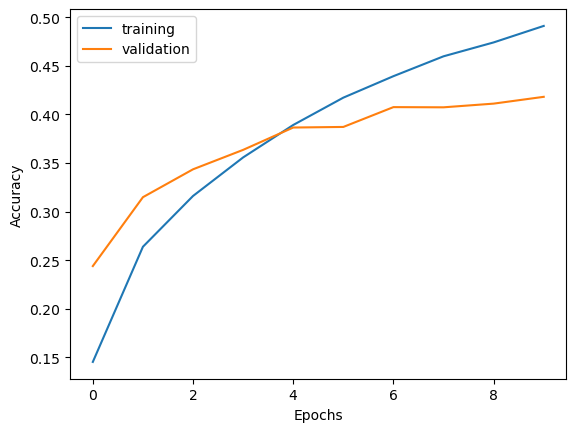

In [16]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

y_pred = model.predict(x_test)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

loss, accuracy = model.evaluate(x_test, y_test)
f1 = f1_score(y_test_classes, y_pred_classes, average="macro")

print(f"Test loss: {loss:.2f}")
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test F1: {f1:.2f}")

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predicted class: 68
Actual class: 49
Classification probabilities: [1.31015895e-07 8.33833110e-05 2.13918202e-02 2.61488254e-03
 2.22930615e-03 2.51596957e-03 1.84655204e-04 5.42616704e-03
 5.17094880e-03 2.65036244e-03 5.68260264e-04 1.57546066e-02
 9.97224227e-02 2.77027604e-03 1.79931903e-05 3.77115863e-03
 4.93083498e-04 4.04145522e-03 1.22517347e-03 7.93030020e-04
 2.03474658e-03 1.01553735e-04 1.01346825e-03 6.38200017e-03
 1.88352074e-03 2.23423121e-03 5.24391304e-04 4.46145190e-03
 2.53669132e-05 7.43542286e-03 5.82320727e-02 1.64475001e-03
 7.98804406e-03 1.71011052e-04 8.12754210e-04 1.26764812e-02
 2.37174128e-04 2.96450523e-03 8.12255137e-04 1.65469553e-02
 1.94365196e-02 2.92915618e-04 1.78978324e-03 5.18810586e-04
 7.83964060e-03 3.10466625e-03 1.89681593e-02 2.41011992e-04
 1.04310946e-03 6.29258230e-02 2.35456717e-03 1.52791676e-04
 7.56276931e-05 4.96553075e-05 2.35458044e-03 1.27291186e-02
 1.44444238e-02 8.46245151e-04 6.76566595e-03 4.23201099e-02
 3.93379596e-04 5.

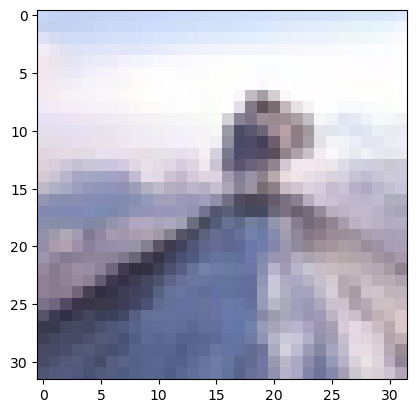

In [17]:
predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_classes != actual_classes)[0]
misclassified_samples = x_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

imshow(misclassified_samples[0])
print(f"Predicted class: {predicted_classes[misclassified_indices[0]]}")
print(f"Actual class: {actual_classes[misclassified_indices[0]]}")
print(f'Classification probabilities: {y_pred[misclassified_indices[0]]}')

Predicted: 33
Actual: 33
Classification probabilities: [7.4367289e-04 6.1493190e-03 8.4439041e-03 1.0541962e-02 5.5643232e-03
 4.2292522e-03 9.7318809e-04 2.7825423e-03 1.6242666e-02 5.9070857e-03
 6.8488409e-04 2.2662957e-03 1.1136491e-03 4.2969757e-03 2.1204853e-03
 5.4849093e-03 3.3256935e-03 9.1014738e-04 8.1126755e-03 8.2781836e-03
 1.4263866e-03 3.6266181e-03 1.1729177e-03 5.9780159e-05 1.4373992e-04
 5.9073111e-03 6.1476626e-04 1.2620953e-02 2.8076735e-03 1.0528039e-02
 9.4291894e-04 3.3682525e-02 1.3352930e-02 9.5822290e-02 6.0821455e-02
 1.0012315e-02 2.2771999e-03 1.1599788e-02 3.5674196e-02 1.3207706e-03
 8.9225423e-04 1.7663029e-03 1.5947595e-02 3.4482747e-03 5.6226533e-03
 4.3357275e-03 2.5360573e-03 1.4539345e-03 4.3966254e-04 3.4868840e-06
 8.6451340e-03 1.4806600e-02 1.3972400e-04 3.8972529e-04 2.8912458e-03
 5.6438963e-03 1.0367278e-02 2.3877029e-03 1.2753740e-03 5.3816028e-03
 2.3565060e-06 3.3808936e-04 9.7339979e-04 9.0582959e-02 9.8533565e-03
 5.8041330e-02 3.77601

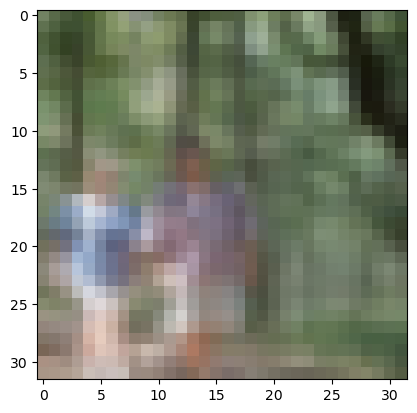

In [18]:
correct_indices = np.where(predicted_classes == actual_classes)[0]
correct_samples = x_test[correct_indices]
correct_labels = np.argmax(y_test[correct_indices], axis=1)

imshow(correct_samples[0])
print(f"Predicted: {predicted_classes[correct_indices[0]]}")
print(f"Actual: {actual_classes[correct_indices[0]]}")
print(f'Classification probabilities: {y_pred[correct_indices[0]]}')

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

<span style="color:orange">

The test accuracy improved to 41.21% and F1 score improved to 0.41. That is a very good improvement with the addition of dropout layer and increasing the filters in the convolution layers. The major improvement is the solving of the overfitting problem as it allows the validation accuracy to improve along with the training accuracy during each epoch. Further improvement should be achievable by increasing the number of epochs, adding additional convolution and dense layers as well as different parameter such as number of filters. While researching, it looks like KerasTuner is a good tool to help fine tune the model.

<span>

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.